Total entries in sprot_2017: 6703
Total entries in toxprot_2017: 6658
Entries only in sprot_2017: 46
Entries only in toxprot_2017: 1
Entries in both datasets: 6657


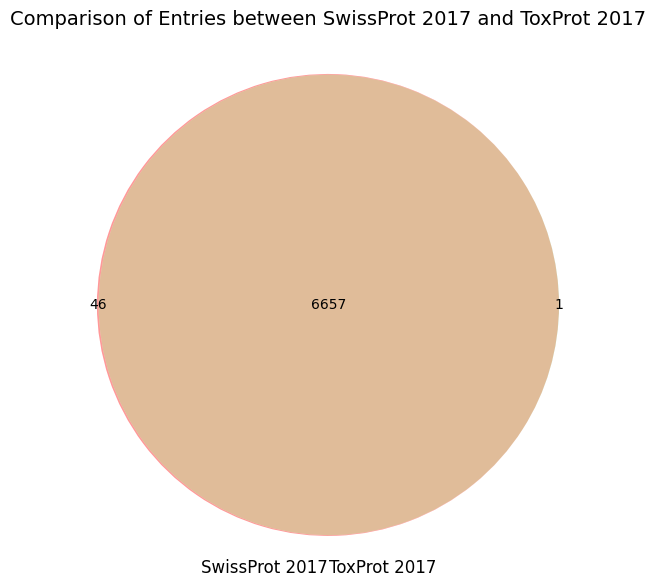


Sample entries only in SwissProt 2017:
['A0A0J9X1W9', 'I7GQA7', 'P0DL75', 'C0HKY7', 'P0DP97']

Sample entries only in ToxProt 2017:
['P49265']

Sample entries in both datasets:
['B1P1F7', 'C0HJC1', 'P84673', 'P0CY85', 'F8J2E2']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the datasets
sprot_2017 = pd.read_csv('../data/interim/toxprot_2017.csv')
toxprot_2017 = pd.read_csv('../data/interim/toxprot_2017_old.csv')

# Extract Entry columns and convert to sets
sprot_entries = set(sprot_2017['Entry'])
toxprot_entries = set(toxprot_2017['Entry'])

# Calculate set operations
only_sprot = sprot_entries - toxprot_entries
only_toxprot = toxprot_entries - sprot_entries
intersection = sprot_entries.intersection(toxprot_entries)

# Print summary statistics
print(f"Total entries in sprot_2017: {len(sprot_entries)}")
print(f"Total entries in toxprot_2017: {len(toxprot_entries)}")
print(f"Entries only in sprot_2017: {len(only_sprot)}")
print(f"Entries only in toxprot_2017: {len(only_toxprot)}")
print(f"Entries in both datasets: {len(intersection)}")

# Create Venn diagram
plt.figure(figsize=(10, 6))
venn = venn2(
    subsets=(len(only_sprot), len(only_toxprot), len(intersection)),
    set_labels=('SwissProt 2017', 'ToxProt 2017')
)

# Customize the Venn diagram
plt.title('Comparison of Entries between SwissProt 2017 and ToxProt 2017', fontsize=14)
for text in venn.set_labels:
    if text is not None:
        text.set_fontsize(12)
for text in venn.subset_labels:
    if text is not None:
        text.set_fontsize(10)

plt.tight_layout()
plt.show()

# Display a few examples from each set
print("\nSample entries only in SwissProt 2017:")
print(list(only_sprot)[:5])

print("\nSample entries only in ToxProt 2017:")
print(list(only_toxprot)[:5])

print("\nSample entries in both datasets:")
print(list(intersection)[:5])
